<a href="https://colab.research.google.com/github/nicolasero87/Personas-Privadas-Libertad-MusicaSpotify-Nicolas_Rom-n/blob/main/1_Spotify_Nicolas_Rom%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA BASE N° 1 PERSONAS PRIVADAS DE LA LIBERTAD**
documento: DB_Altas_PPL_Entrega 19-08.xlsx

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Standard
from bokeh.io import output_notebook, show, reset_output
# Other
import bokeh
from bokeh.plotting import figure

In [ ]:
! git clone https://github.com/nicolasero87/PPL_ALTAS.git

Cloning into 'PPL_ALTAS'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 32 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 28.00 MiB | 16.08 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
import pandas as pd
df = pd.read_excel('/content/PPL_ALTAS/DB_Altas_PPL_Entrega 19-08.xlsx')

In [ ]:
df.head()

,id Unico,fecha308,ID_sexo,Sexo,ID_bienjuridico,bienjuridico,ID_clasifcg,clasifcg,ID_depto,depto,...,Depto UFD,UFD,DIM_dep_Policial,Dep Policial,ID_Flagrancia,Flagrancia,ID_Revifag,revifag,ID_Delito Max Pena,Delito Max Pena
0,1,03-04-2024,1,M,1.0,Delitos contra las personas,1.0,Lesiones leves agravadas,1,Avellaneda,...,Avellaneda,Unidad Funcional De Defensa Penal Nº 10 Especi...,1,Lanus 5º,1,Proceso Especial de Flagrancia,1,SI,1.0,Lesiones agravadas artículo 89 - Art.92
1,2,03-04-2024,1,M,2.0,Delitos contra la Administración Pública,2.0,Encubrimiento,1,Avellaneda,...,Avellaneda,Unidad de Defensa Penal N° 3 AVELLANEDA,1,Lanus 5º,0,NaN,2,NO,2.0,Encubrimiento - Art.277 Inc.1º
2,3,03-04-2024,1,M,3.0,Delitos contra la propiedad,3.0,Robo agravado uso de arma,1,Avellaneda,...,Avellaneda,Unidad de Defensa Penal N° 3 AVELLANEDA,2,Avellaneda 5º,0,NaN,2,NO,3.0,Robo agravado (uso de arma de fuego no apta pa...
3,4,03-04-2024,1,M,1.0,Delitos contra las personas,4.0,Lesiones leves,1,Avellaneda,...,Avellaneda,Unidad Funcional De Defensa Penal Nº 10 Especi...,3,Lanus 7º,1,Proceso Especial de Flagrancia,1,SI,4.0,Lesiones leves - Art.89
4,5,03-04-2024,2,F,4.0,Delitos contra la seguridad pública,5.0,Portación y Tenencia de arma de fuego,1,Avellaneda,...,Avellaneda,Unidad de Defensa Penal N° 3 AVELLANEDA,4,Lanus 8º,1,Proceso Especial de Flagrancia,2,NO,5.0,Tenencia ilegal de arma de fuego de uso civil ...


In [ ]:
df.shape

(2009, 25)

In [ ]:
df.depto.unique()

array(['Avellaneda', 'Azul', 'Bahia Blanca', 'Dolores', 'Junin',
       'La Matanza', 'La Plata', 'Lomas De Zamora', 'Mar Del Plata',
       'Mercedes', 'Moreno-Gral. Rodriguez'], dtype=object)

In [ ]:
df.bienjuridico.unique()

array(['Delitos contra las personas',
       'Delitos contra la Administración Pública',
       'Delitos contra la propiedad',
       'Delitos contra la seguridad pública', nan,
       'Delitos contra la libertad',
       'Delitos contra la integridad sexual',
       'Delitos contra la administración pública',
       'Delitos contra el orden Público', 'Leyes',
       'Delitos contra la fe Pública', 'Otros'], dtype=object)

In [ ]:
df.isnull().sum()

,0
id Unico,0
fecha308,9
ID_sexo,0
Sexo,0
ID_bienjuridico,44
bienjuridico,44
ID_clasifcg,44
clasifcg,44
ID_depto,0
depto,0


In [ ]:
## reemplazar is null en flagrancia por 0

In [ ]:
##no sirve porque no son valores cuantificables
df.describe().round()

,id Unico,ID_sexo,ID_bienjuridico,ID_clasifcg,ID_depto,ID_Depto Organismo Final,DIM_dep_Policial,ID_Flagrancia,ID_Revifag,ID_Delito Max Pena
count,2009.0,2009.0,1965.0,1965.0,2009.0,2005.0,2009.0,2009.0,2009.0,1965.0
mean,1005.0,1.0,3.0,10.0,6.0,6.0,135.0,0.0,2.0,31.0
std,580.0,0.0,1.0,7.0,3.0,3.0,90.0,0.0,0.0,27.0
min,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
25%,503.0,1.0,3.0,5.0,4.0,2.0,49.0,0.0,2.0,11.0
50%,1005.0,1.0,3.0,7.0,7.0,7.0,144.0,0.0,2.0,24.0
75%,1507.0,1.0,3.0,17.0,8.0,8.0,209.0,1.0,2.0,45.0
max,2009.0,3.0,11.0,35.0,11.0,12.0,312.0,1.0,2.0,138.0


In [ ]:
df.describe(include='object')

,fecha308,Sexo,bienjuridico,clasifcg,depto,Depto Organismo Final,Organismo Final,Depto UFI,UFI,Depto UFD,UFD,Dep Policial,Flagrancia,revifag,Delito Max Pena
count,2000,2009,1965,1965,2009,2005,2005,1998,1998,2000,2000,1815,540,2009,1965
unique,31,3,11,34,11,11,62,11,143,11,93,311,1,2,137
top,22-04-2024,M,Delitos contra la propiedad,Robo,La Plata,La Plata,JG-Nº 3,La Plata,UFI Flagrancia,La Plata,UFD La Matanza,Cdo.pat. B. Blanca,Proceso Especial de Flagrancia,NO,Robo - Art.164
freq,129,1820,998,298,438,438,324,438,168,438,259,41,540,1833,176


In [ ]:
##posibles preguntas: 1. cual es el organismo final que mas ingresos tuvo? ordenar los 5 primeros 2. cuales son los 10 primeros delitos maxima pena?

### **ANALISIS SEGUN GENERO**

In [ ]:
df_genero = df.Sexo.value_counts().rename('Cantidad').rename_axis('Género').rename(index={'M': 'Masculino', 'F': 'Femenino', 'X': 'No Binario'})
df_genero

,Cantidad
Género,
Masculino,1820
Femenino,188
No Binario,1


<Axes: xlabel='Género', ylabel='Cantidad'>

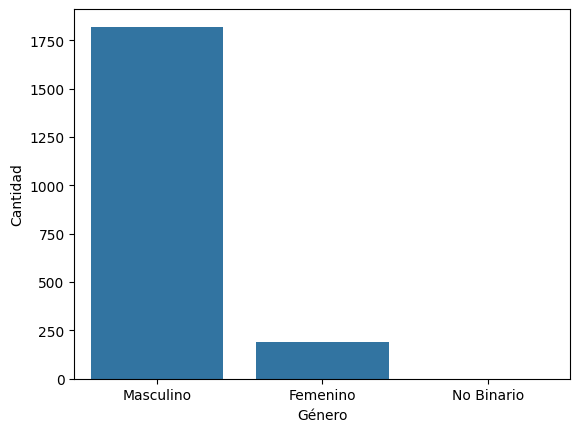

In [ ]:
sns.barplot(data=df_genero)


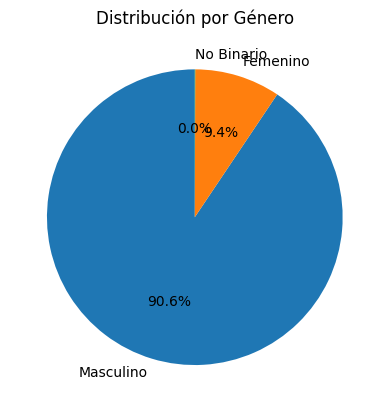

In [ ]:
plt.pie(df_genero.values, labels=df_genero.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución por Género")
plt.show()

In [ ]:
df_depto_genero=df[['Sexo','bienjuridico','depto']].groupby(by=['Sexo', 'bienjuridico', 'depto']).count().rename_axis(['Género', 'Bien Jurídico', 'Departamento'])
df_depto_genero


Empty DataFrame
Columns: []
Index: [(F, Delitos contra la Administración Pública, Bahia Blanca), (F, Delitos contra la Administración Pública, Dolores), (F, Delitos contra la Administración Pública, Junin), (F, Delitos contra la Administración Pública, La Plata), (F, Delitos contra la Administración Pública, Lomas De Zamora), (F, Delitos contra la Administración Pública, Mar Del Plata), (F, Delitos contra la administración pública, La Plata), (F, Delitos contra la fe Pública, La Plata), (F, Delitos contra la integridad sexual, Bahia Blanca), (F, Delitos contra la libertad, Azul), (F, Delitos contra la libertad, Bahia Blanca), (F, Delitos contra la libertad, Dolores), (F, Delitos contra la libertad, Junin), (F, Delitos contra la libertad, La Matanza), (F, Delitos contra la libertad, Lomas De Zamora), (F, Delitos contra la libertad, Mar Del Plata), (F, Delitos contra la libertad, Mercedes), (F, Delitos contra la propiedad, Avellaneda), (F, Delitos contra la propiedad, Azul), (F, Delitos contra la propiedad, Bahia Blanca), (F, Delitos contra la propiedad, Dolores), (F, Delitos contra la propiedad, Junin), (F, Delitos contra la propiedad, La Matanza), (F, Delitos contra la propiedad, La Plata), (F, Delitos contra la propiedad, Lomas De Zamora), (F, Delitos contra la propiedad, Mar Del Plata), (F, Delitos contra la propiedad, Mercedes), (F, Delitos contra la propiedad, Moreno-Gral. Rodriguez), (F, Delitos contra la seguridad pública, Avellaneda), (F, Delitos contra la seguridad pública, Azul), (F, Delitos contra la seguridad pública, Bahia Blanca), (F, Delitos contra la seguridad pública, Dolores), (F, Delitos contra la seguridad pública, Junin), (F, Delitos contra la seguridad pública, La Matanza), (F, Delitos contra la seguridad pública, La Plata), (F, Delitos contra la seguridad pública, Lomas De Zamora), (F, Delitos contra la seguridad pública, Mar Del Plata), (F, Delitos contra la seguridad pública, Mercedes), (F, Delitos contra las personas, Avellaneda), (F, Delitos contra las personas, Bahia Blanca), (F, Delitos contra las personas, Junin), (F, Delitos contra las personas, La Plata), (F, Delitos contra las personas, Lomas De Zamora), (F, Delitos contra las personas, Mar Del Plata), (M, Delitos contra el orden Público, Azul), (M, Delitos contra el orden Público, La Matanza), (M, Delitos contra el orden Público, La Plata), (M, Delitos contra el orden Público, Mercedes), (M, Delitos contra la Administración Pública, Avellaneda), (M, Delitos contra la Administración Pública, Azul), (M, Delitos contra la Administración Pública, Bahia Blanca), (M, Delitos contra la Administración Pública, Dolores), (M, Delitos contra la Administración Pública, Junin), (M, Delitos contra la Administración Pública, La Matanza), (M, Delitos contra la Administración Pública, La Plata), (M, Delitos contra la Administración Pública, Lomas De Zamora), (M, Delitos contra la Administración Pública, Mar Del Plata), (M, Delitos contra la Administración Pública, Mercedes), (M, Delitos contra la administración pública, Avellaneda), (M, Delitos contra la administración pública, Bahia Blanca), (M, Delitos contra la administración pública, Junin), (M, Delitos contra la administración pública, La Matanza), (M, Delitos contra la administración pública, La Plata), (M, Delitos contra la administración pública, Lomas De Zamora), (M, Delitos contra la administración pública, Mar Del Plata), (M, Delitos contra la administración pública, Mercedes), (M, Delitos contra la administración pública, Moreno-Gral. Rodriguez), (M, Delitos contra la fe Pública, La Matanza), (M, Delitos contra la fe Pública, La Plata), (M, Delitos contra la integridad sexual, Avellaneda), (M, Delitos contra la integridad sexual, Azul), (M, Delitos contra la integridad sexual, Dolores), (M, Delitos contra la integridad sexual, Junin), (M, Delitos contra la integridad sexual, La Matanza), (M, Delitos contra la integridad sexual, La Plata), (M, Delitos contra la integridad sexual, Lomas De Zamora), (M

In [ ]:
##hacer un grafico con esta tabla

## **ANALISIS SEGUN BIEN JURIDICO TUTELADO**

In [ ]:
df_bienjurico_top = df.bienjuridico.value_counts().head(5).rename_axis('Bien Juridico Tutelado').rename('Cantidad')
df_bienjurico_top

,Cantidad
Bien Juridico Tutelado,
Delitos contra la propiedad,998
Delitos contra la Administración Pública,261
Delitos contra la seguridad pública,223
Delitos contra la libertad,205
Delitos contra las personas,179


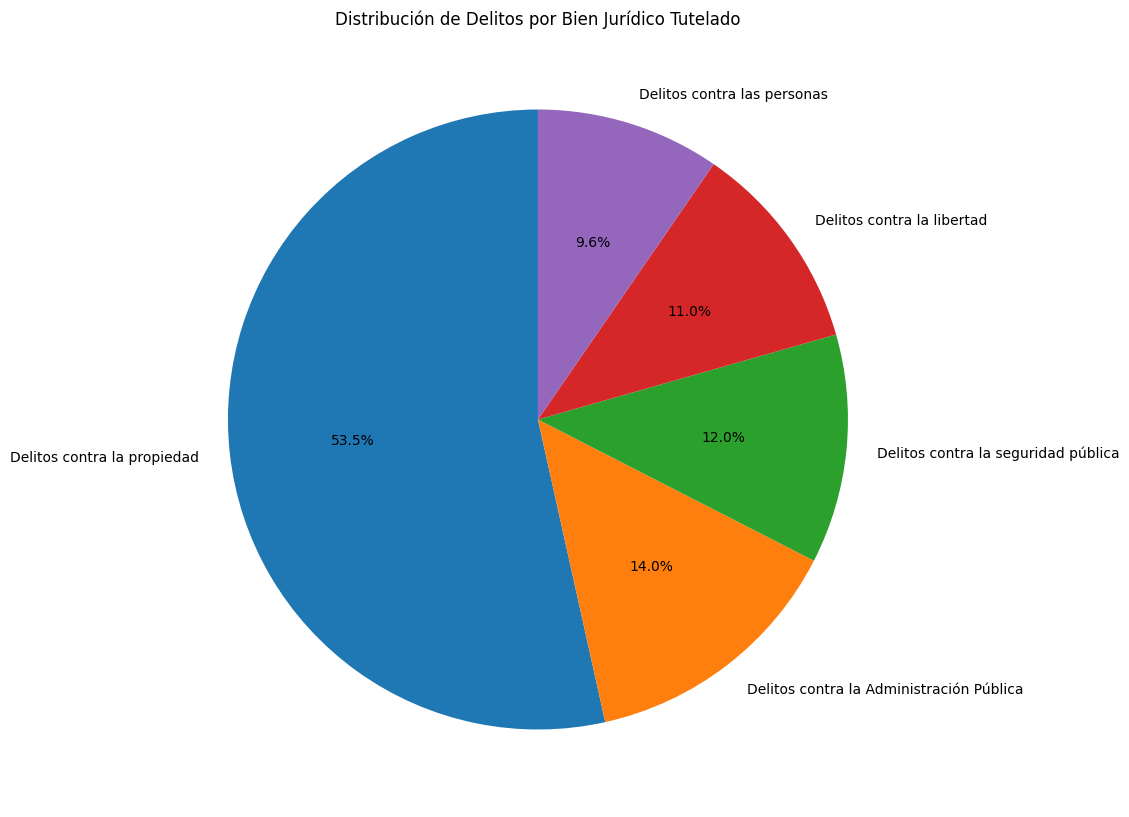

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(10, 18))
df_bienjurico_top.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribución de Delitos por Bien Jurídico Tutelado")
plt.ylabel('')  # Remove the default y-label
plt.show()

## **ANALISIS SEGUN DEPARTAMENTO JUDICIAL** REHACER LOS GRAFICOS ERROR

In [ ]:
df_depto_top = df.depto.value_counts().head(5)rename_axis('Departamento Judicial').rename('Cantidad')
df_depto_top

####df_bienjurico_top = df.bienjuridico.value_counts().head(5).rename_axis('Bien Juridico Tutelado').rename('Cantidad')
#df_bienjurico_top

SyntaxError: invalid syntax (<ipython-input-4-a06a6884a580>, line 1)

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=df_depto_top.index, y=df_depto_top.values)
plt.xlabel("Departamento Judicial")
plt.ylabel("Cantidad")
plt.title("Top 5 Departamentos Judiciales por Cantidad de Personas Privadas de Libertad")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

NameError: name 'plt' is not defined


## **ANALISIS SEGUN DELITO**



In [ ]:
df_delito = df[['clasifcg','depto']].groupby(by=['clasifcg', 'depto']).size().rename('Cantidad').rename_axis(['Delito', 'Departamento'])
df_delito

Delito                          Departamento          
Abuso de arma de fuego          La Plata                   2
                                Lomas De Zamora            2
Abuso sexual con acceso carnal  Bahia Blanca               2
                                La Plata                   1
                                Lomas De Zamora            2
                                                          ..
Robo agravado  uso de arma      La Plata                  14
                                Lomas De Zamora           42
                                Mar Del Plata             14
                                Mercedes                   4
                                Moreno-Gral. Rodriguez     2
Name: Cantidad, Length: 231, dtype: int64

In [ ]:
##los 5 delitos cometidos en mayor cantidad segun departamento
df_delitos_5 = df_delito.sort_values(ascending=False).head(5)

print(df_delitos_5)

Delito                 Departamento   
Otros robos agravados  La Plata           61
Robo                   Mar Del Plata      61
Encubrimiento          La Plata           61
                       Lomas De Zamora    56
Robo                   La Plata           53
Name: Cantidad, dtype: int64


In [ ]:
##hacer grafico de torta

In [ ]:
##los 5 delitos cometidos en menor cantidad segun departamento
df_delitos_5_lowest = df_delito.sort_values(ascending=False).tail(20)
df_delitos_5_lowest

Delito                                                 Departamento          
Otros homicidios agravados                             La Matanza                1
Otros delitos contra la propiedad                      Junin                     1
Otros homicidios agravados                             Mar Del Plata             1
Otros delitos contra la integridad sexual              Mar Del Plata             1
                                                       La Plata                  1
                                                       La Matanza                1
Otros hurtos agravados                                 Junin                     1
Otros                                                  Mercedes                  1
                                                       La Plata                  1
Lesiones culposas                                      Mercedes                  1
Otros hurtos agravados                                 Moreno-Gral. Rodriguez    1
Hurto agravado de vehículos dejados en la vía pública  Mar Del Plata             1
                                                       Bahia Blanca              1
Hurto                                                  Moreno-Gral. Rodriguez    1
Homicidio en ocasión de robo                           Lomas De Zamora           1
                                                       Bahia Blanca              1
                                                       Avellaneda                1
Homicidio criminis causa                               Moreno-Gral. Rodriguez    1
Otros delitos contra la seguridad pública              La Plata                  1
Homicidio criminis causa                               Lomas De Zamora           1
Name: Cantidad, dtype: int64

## **ANALISIS SEGUN JUZGADO**


In [ ]:
df_Organismo_Final = df[['Organismo Final','depto']].groupby(by=['Organismo Final', 'depto']).size().rename('Cantidad').rename_axis(['Juzgado', 'Departamento'])
df_Organismo_Final

,,Cantidad
Juzgado,Departamento,
JC-Nº 1,La Plata,3
JC-Nº 1 DEL DEPARTAMENTO JUDICIAL JUNÍN,Junin,1
JC-Nº 2,La Plata,6
JC-Nº 3,La Plata,1
JC-Nº 3 DEL DEPARTAMENTO JUDICIAL JUNÍN,Junin,2
...,...,...
TOC-Nº 2,La Plata,1
TOC-Nº 3,La Plata,3
TOC-Nº 4,La Plata,10


In [ ]:
##ME LOS ORDENE DE MAYOR A MENOR Y ME DIGA EL TOP 5
df_Organismo_Final_sorted = df_Organismo_Final.sort_values(ascending=False).head(5)

print(df_Organismo_Final_sorted)

Juzgado                    Departamento   
JG-Nº 5                    La Plata           154
JG-Nº 2                    La Plata           142
JG-Juz. Gar. Nº 3          Lomas De Zamora    138
JG-Nº 3                    La Matanza         136
JG-Juz. Gar. N° 4 - Lanus  Avellaneda          95
Name: Cantidad, dtype: int64


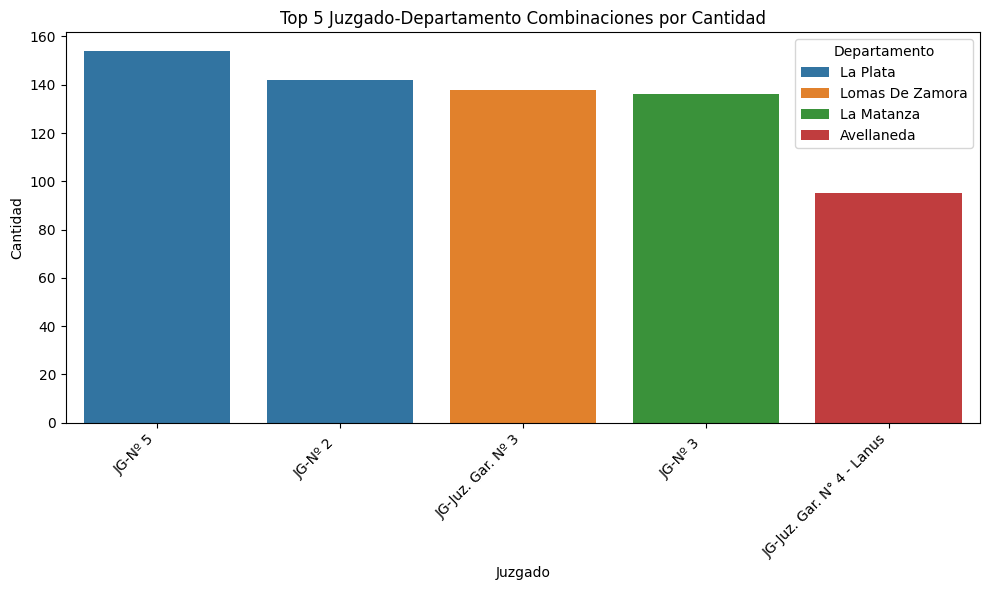

In [ ]:
# Convert the Series to a DataFrame for easier plotting
df_Organismo_Final_sorted = df_Organismo_Final_sorted.reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(data=df_Organismo_Final_sorted, x='Juzgado', y='Cantidad', hue='Departamento')
plt.title("Top 5 Juzgado-Departamento Combinaciones por Cantidad")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.legend(title='Departamento', loc='upper right')  # Customize legend
plt.show()

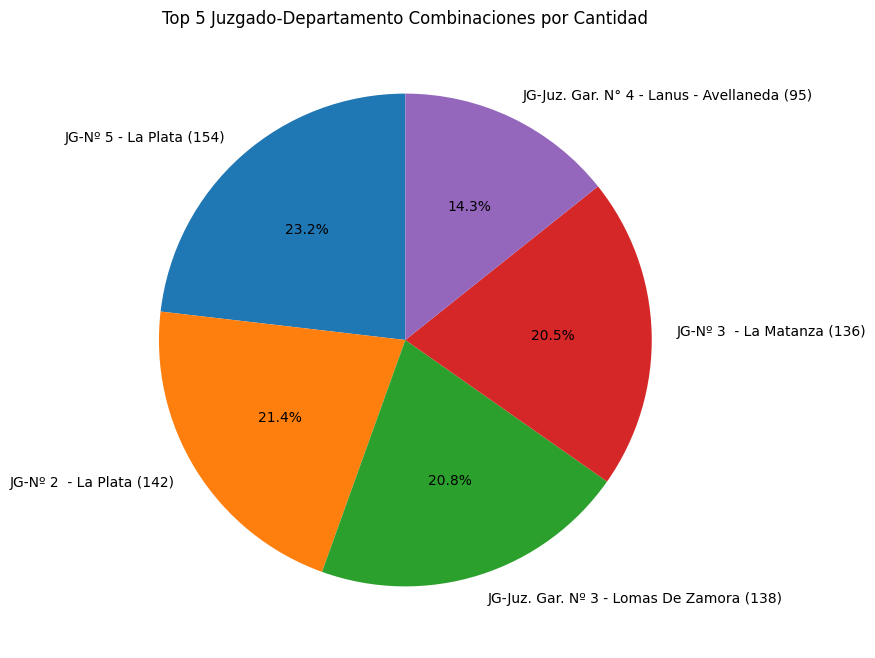

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_Organismo_Final_sorted is your DataFrame with the top 5 values

# Create labels for the pie chart, including Cantidad values
labels = df_Organismo_Final_sorted['Juzgado'] + ' - ' + df_Organismo_Final_sorted['Departamento'] + ' (' + df_Organismo_Final_sorted['Cantidad'].astype(str) + ')'

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(df_Organismo_Final_sorted['Cantidad'], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Juzgado-Departamento Combinaciones por Cantidad")
plt.show()

# **DATA BASE N° 2 ATRIBUTOS DE CANCIONES**
documento: songAttributes_1999-2019.xlsx**

Spotify Song Attributes
A dataset of 2017 songs with attributes from Spotify's API.
Each row represents a song.
There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called "target" which the label for the song.
Here are the 13 track attributes: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence.


In [ ]:
import pandas as pd
df_2 = pd.read_csv('/content/PPL_ALTAS/songAttributes_1999-2019.csv')

In [ ]:
df_2.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
df_2.shape

(2017, 17)

In [ ]:
df_2.isnull().sum()

,0
Unnamed: 0,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0


In [ ]:
df_2.describe().round()

,Unnamed: 0,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
count,154931.0,154931.0,154896.0,154896.0,154896.0,154896.0,154896.0,154896.0,154896.0,154535.0,154535.0,154535.0,154535.0,154535.0
mean,169.0,0.0,1.0,232451.0,1.0,0.0,0.0,-7219.0,1.0,20.0,0.0,107219.0,4.0,0.0
std,227.0,0.0,0.0,120522.0,0.0,0.0,0.0,4601.0,0.0,17.0,0.0,46377.0,0.0,0.0
min,0.0,0.0,0.0,1731.0,0.0,0.0,0.0,-52672.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,39.0,0.0,0.0,188907.0,0.0,0.0,0.0,-9400.0,0.0,6.0,0.0,87996.0,4.0,0.0
50%,91.0,0.0,1.0,224747.0,1.0,0.0,0.0,-6545.0,1.0,17.0,0.0,112663.0,4.0,0.0
75%,197.0,0.0,1.0,263653.0,1.0,0.0,0.0,-4563.0,1.0,31.0,0.0,136338.0,4.0,1.0
max,1796.0,1.0,1.0,4795973.0,1.0,1.0,1.0,3515.0,1.0,91.0,1.0,232412.0,5.0,1.0


In [ ]:
df_2.describe(include='object')

,Album,Artist,Explicit,Name
count,154918,154896,154896,154895
unique,9797,989,2,105028
top,Live,Oakenfold,False,Intro
freq,220,1797,121812,489


# **DATA BASE N° 3 DATA SET DE SPOTIFY**


documento: spotify_dataset.xlsx**

Columns Description:

id: Unique identifier for the track on Spotify.

name: Name of the track.

genre: genre of the song.

artists: Names of the artists who performed the track, separated by commas if there are multiple artists.

album: Name of the album the track belongs to.

popularity: Popularity score of the track (0-100, where higher is more popular).

duration_ms: Duration of the track in milliseconds.

explicit: Boolean indicating whether the track contains explicit content.

In [ ]:
import pandas as pd
df_3 = pd.read_csv('/content/PPL_ALTAS/spotify_dataset.csv')

In [ ]:
df_3.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


In [ ]:
df_3.shape

(41099, 20)

In [ ]:
df_3.isnull().sum()

,0
track,0
artist,0
uri,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0


In [ ]:
df_3.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity
count,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,4.109900e+04,41099.000000,41099.000000,41099.000000,41099.000000
mean,0.539683,0.579544,5.213752,-10.221446,0.693375,0.072952,0.364232,0.154403,0.201534,0.542450,119.336349,2.348755e+05,3.893647,40.106896,10.475632,0.499964
std,0.177808,0.252629,3.535060,5.311227,0.461098,0.086106,0.338908,0.303518,0.172957,0.267333,29.099116,1.189696e+05,0.423072,19.006697,4.872026,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816500,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.395500,1.729165e+05,4.000000,27.599510,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.559000,117.564000,2.179070e+05,4.000000,35.850270,10.000000,0.000000
75%,0.669000,0.787000,8.000000,-6.375000,1.000000,0.069800,0.676000,0.061200,0.261000,0.768000,136.492000,2.667730e+05,4.000000,47.627240,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [ ]:
df_3.describe(include='object')

,track,artist,uri,decade
count,41099,41099,41099,41099
unique,35853,11902,40553,6
top,Falling,Traditional,spotify:track:0wz1LjDb9ZNEYwOmDJ3Q4b,60s
freq,17,207,3,8642
